# Flight Price Predction

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data
df=pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

<AxesSubplot:xlabel='stops', ylabel='price'>

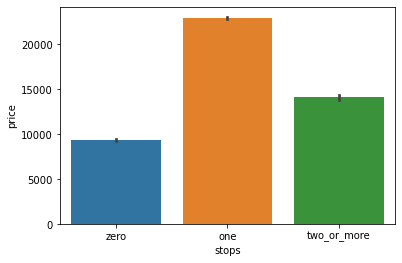

In [6]:
sns.barplot(x='stops',y='price',data=df)

<AxesSubplot:xlabel='airline', ylabel='price'>

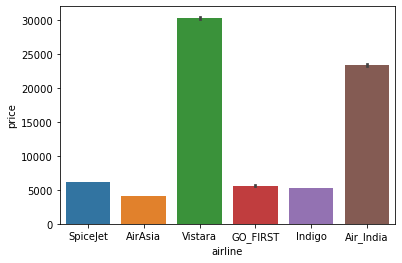

In [7]:
sns.barplot('airline','price',data=df)

<AxesSubplot:xlabel='price', ylabel='Density'>

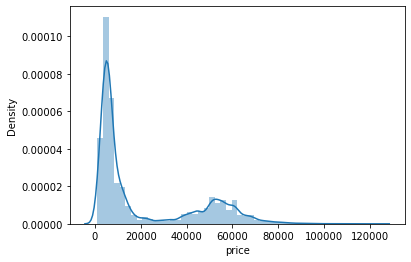

In [8]:
sns.distplot(df['price'])

In [9]:
def stops_code(x):
    if x == 'one':
        return 1
    elif x == 'zero':
        return 0
    else:
        return 2

In [10]:
df['stops'] = df['stops'].apply(stops_code).astype(int)

<AxesSubplot:>

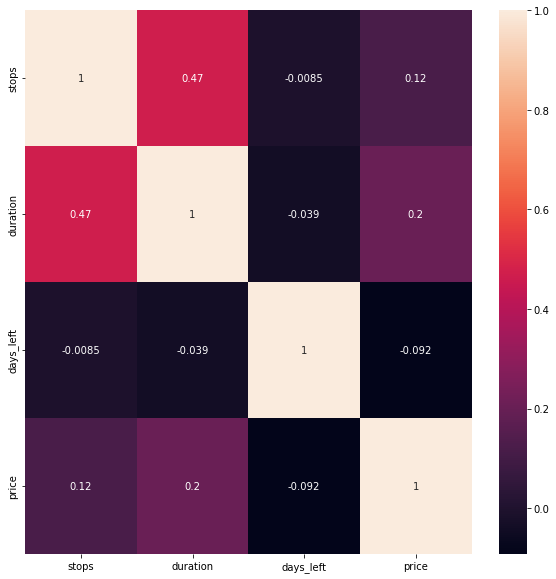

In [11]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

In [12]:
df.drop('days_left', axis = 1, inplace = True)
df.drop('flight', axis = 1, inplace = True)

In [13]:
X = df.drop('price', axis = 1)
y = df['price']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [15]:
from sklearn.linear_model import LinearRegression
step1 = ColumnTransformer(transformers = [('tnf1',OneHotEncoder(sparse = False, drop = 'first'),[0,1,2,4,5,6]),('tnf2',StandardScaler(),[7])], remainder = 'passthrough')
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 1/3, random_state = 19)
step2 = LinearRegression()
pipe = Pipeline([('step1', step1), ('step2',step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('----Linear Regression----')
print('Accuracy Score', r2_score(y_test, y_pred))

----Linear Regression----
Accuracy Score 0.9049494670695396


In [16]:
from sklearn.tree import DecisionTreeRegressor
step1 = ColumnTransformer(transformers = [('tnf1',OneHotEncoder(sparse = False, drop = 'first'),[0,1,2,4,5,6]),('tnf2',StandardScaler(),[7])], remainder = 'passthrough')
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 1/3, random_state = 19)
step2 = DecisionTreeRegressor()
pipe = Pipeline([('step1', step1), ('step2',step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('----Decision Tree Regression----')
print('Accuracy Score', r2_score(y_test, y_pred))

----Decision Tree Regression----
Accuracy Score 0.9758732874743551


In [17]:
from sklearn.ensemble import RandomForestRegressor
step1 = ColumnTransformer(transformers = [('tnf1',OneHotEncoder(sparse = False, drop = 'first'),[0,1,2,4,5,6]),('tnf2',StandardScaler(),[7])], remainder = 'passthrough')
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 1/3, random_state = 19)
step2 = RandomForestRegressor()
pipe = Pipeline([('step1', step1), ('step2',step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('----Random Forest Regression----')
print('Accuracy Score', r2_score(y_test, y_pred))

----Random Forest Regression----
Accuracy Score 0.9762598459365608


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
step1 = ColumnTransformer(transformers = [('tnf1',OneHotEncoder(sparse = False, drop = 'first'),[0,1,2,4,5,6]),('tnf2',StandardScaler(),[7])], remainder = 'passthrough')
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 1/3, random_state = 19)
step2 = GradientBoostingRegressor()
pipe = Pipeline([('step1', step1), ('step2',step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('----Gradient Boost Regression----')
print('Accuracy Score', r2_score(y_test, y_pred))

----Gradient Boost Regression----
Accuracy Score 0.9428199070392201


we have use multiple algorithams for predicting the flight price so the 
random forest give us the best accuracy as compare to others.